In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Set up Seaborn with default theme, scaling, and color palette
sns.set()

# Scikit-learn
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import confusion_matrix

In [2]:
mnist = pd.read_csv('mnist_784.csv')

In [3]:
X = mnist.drop('class', axis=1)
y = mnist['class'].copy()

In [4]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


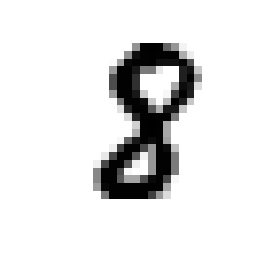

In [5]:
some_digit = X.iloc[24000]
some_digit_image = some_digit.values.reshape(28,28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [6]:
y[24000]

8

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [9]:
clf.predict([some_digit])

array([8])

In [10]:
clf.predict_proba([some_digit])

array([[ 0.04396937,  0.15599849,  0.15872759,  0.10533523,  0.06084904,
         0.07147509,  0.09792978,  0.07023613,  0.17028159,  0.06519768]])

In [11]:
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=10)

In [12]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5054,   10,   20,   15,    6,    0,   20,   40,   22,    2],
       [   5, 5792,   59,    6,    3,    0,    4,   22,    5,    4],
       [ 386, 1014, 3285,   53,   75,    0,  126,  231,   56,    3],
       [ 455,  926,  170, 3267,  117,    2,   10,  185,   85,  118],
       [  96,  134,   47,   13, 4102,    0,  133,  315,   43,  354],
       [1206,  540,   60, 1366,  478,  239,  128,  220,  166,  303],
       [ 664,  464,  225,   62,  324,    0, 3157,  176,   41,    2],
       [ 108,  453,  125,    6,  112,    0,    1, 4536,   44,   30],
       [ 159, 1378,  322,  211,  318,    0,   89,   57, 2481,  153],
       [ 104,  203,   29,   95, 2129,    0,   29,  726,   48, 1843]])

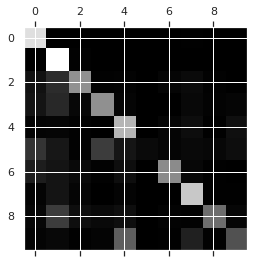

In [13]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

In [16]:
unique, counts = np.unique(y_train, return_counts=True)
np.asarray((unique, counts)).T

array([[   0, 5189],
       [   1, 5900],
       [   2, 5229],
       [   3, 5335],
       [   4, 5237],
       [   5, 4706],
       [   6, 5115],
       [   7, 5415],
       [   8, 5168],
       [   9, 5206]])